# Анализ продаж компьютерных игр

## Изучаем общую информацию. 

In [1]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from scipy import stats as st
import seaborn as sns

In [2]:
# открываем файл с данными
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('/Users/misha/Desktop/python/Акселерация/портфолио/games/games.csv')

In [3]:
# изучим предварительные данные
display(games.describe().T)
games.info()

display(games.sample(5))

print('Грубых дубликатов в таблице:', games.duplicated().sum()) 

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11094,Fishing Master World Tour,Wii,2009.0,Sports,0.08,0.00,0.00,0.01,NaN,tbd,E
7261,Deadly Creatures,Wii,2009.0,Action,0.08,0.12,0.00,0.02,72.0,8.8,T
5767,J-League Winning Eleven 2007: Club Championship,PS2,2007.0,Sports,0.00,0.00,0.31,0.00,NaN,NaN,NaN
6717,Grandia,PS,1999.0,Role-Playing,0.14,0.09,0.00,0.02,89.0,6.6,E
14046,Nobunaga's Ambition: Sphere of Influence - Sen...,PS3,2016.0,Misc,0.00,0.00,0.04,0.00,NaN,NaN,NaN


Грубых дубликатов в таблице: 0


В 6 столбцах из 11 имеются пропуски. Требуется отдельно изучить пропуски в каждом столбце и принять решения о необходимости их замены.

Названия столбцов необходимо привести к нижнему регистру.

Данные столбца Year_of_Release переводим в формат дат, Critic_Score в формат int.

Грубых дуюликатов в таблице не обнаружено.

Из предварительных данных видно, что половина продаж - очень низкие значения (0,00 - 0,08 млн. копий).

Также можно отметить, что данные начали фиксировать с 1980 года. Можно предположить, что рост продаж из предварительных данных шел по экспоненте в связи с развитием игровой индустрии. Средний был критиков - 69 (медиана - 71), что является высоким показателем.

## Подготовка данных к анализу

In [4]:
# приведем названия столбцов к нижнему регистру
games.columns = games.columns.str.lower()

display(games.sample(5))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2787,Pirates of the Caribbean: At World's End,PS3,2007.0,Action,0.17,0.41,0.0,0.15,55.0,6.9,T
680,NBA 2K16,XOne,2015.0,Sports,1.95,0.15,0.0,0.24,86.0,6.2,E10+
11455,The Hidden,3DS,NaN,Adventure,0.08,0.00,0.0,0.01,NaN,4.2,E10+
1772,Call of Duty 4: Modern Warfare,PC,2007.0,Shooter,0.00,1.12,0.0,0.03,92.0,8.5,M
9031,Balloon Pop,DS,2009.0,Puzzle,0.13,0.00,0.0,0.01,NaN,tbd,E


In [5]:
# посмотрим срез со значениями в столбце user_score - tbd
games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


В датасете имеются значения TBD = to be determined, что переводится как: "будет определено позднее".

Данные значения можно заменить на Nan или при дальнейшем анализе удалить.

In [6]:
# преобразуем данные year_of_release в нужные типы не представляется возможным, тк есть пропуски
# оставляем как есть, тк замена носит только эстетический характер

games.info()
games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Столбец critic_score перевести в формат int (для удобства) не представляется возможным ввиду наличия пропусков, которые убрать или заменить нельзя (тк иначе они исказят данные).

In [7]:
# проверим наличие пропусков в столбцах
pd.DataFrame(round((games.isna().mean()*100),2)).style.background_gradient('coolwarm') 

,0
name,0.010000
platform,0.000000
year_of_release,1.610000
genre,0.010000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.320000
user_score,40.090000


Пропуски в столбцах critic_score и user_score обработки не требуют, тк игры могут не иметь оценки критиков и игроков. Также пропущен возрастной рейтинг rating. В мире есть порядка 15 официальных организаций, которые определяют, кто сможет купить видеоигру, а кто — нет, и получение рейтинга у конкретной организации не обязательно. В связи с чем можно предположить, что отсутвие пропусков в 40% случаев обусловлено получением рейтинга у сторонних организаций.

In [8]:
# заменим пропуски в rating  на nd (не определен)
games['rating'] = games['rating'].fillna('nd')

In [9]:
pd.DataFrame(round((games.isna().mean()*100),2)).style.background_gradient('coolwarm') 

,0
name,0.010000
platform,0.000000
year_of_release,1.610000
genre,0.010000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.320000
user_score,40.090000


In [10]:
# проврим данные с пропусками в name и genre
display(games[games['name'].isnull()]) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,nd
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,nd


In [11]:
games.dropna(subset = ['name'], inplace = True) 

In [12]:
display(games[games['year_of_release'].isnull()]) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,nd
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,nd
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,nd


Пропуски (269) в столбце year_of_release ошибочные и при необходимости можно в открытх источниках найти дату релиза каждой игры по отдельности. Тк замена типа данных носит лишь эстетический характер, автоматически заменить данные нельзя, пропуски оставляем и тип данных не меняем.

In [13]:
games.dropna(subset = ['year_of_release'], inplace = True) 
games['year_of_release'] = games['year_of_release'].astype(int)

In [14]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Пропуски в name и genre скорее всего случайные и тк они не повлияют на общий результат (2 строки) удаляем.

In [15]:
#добавляем столбец с суммарными продажами во всех регионах
games['sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,nd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,nd,31.38


Итоги предобработки данных:

- привели названия столбцов к нижнему ригистру;
- замены типа данных не проводили в связи с отсутствием необходимости;
- удалил 2 строки с пропусками в названии и жанре;
- добавили столбец с итоговой выручкой

## Исследовательский анализ данных

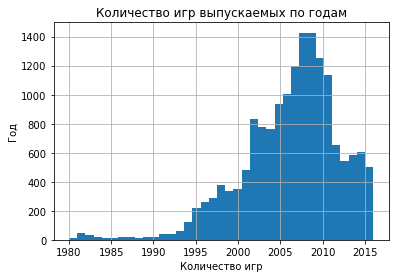

In [16]:
# Изучим, сколько игр выпускалось в разные годы
games['year_of_release'].hist(bins=37)
plt.title("Количество игр выпускаемых по годам")
plt.xlabel("Количество игр")
plt.ylabel("Год")
plt.show()

In [17]:
# количество проданных игр по каждой платформе
games_per_platform = games.pivot_table(index = ['platform'], values='name', aggfunc='count')
games_per_platform.sort_values('name', ascending=False)

,name
platform,
PS2,2127
DS,2121
PS3,1306
Wii,1286
X360,1232
PSP,1193
PS,1190
PC,957
GBA,811


Из гистограммы выидно, что пик выпуска игр пришелся на 2008-2009 годы, далее видно спад показателей. Спад производства игр можно связать с мировым кризисом наступившим в эти даты (2008 год), ввиду чего упала покапательная способность населения во всем мире. Также можно обратить внимание, что из представленных платформ отсутствуют игры на ios и andtoid, но что поизводители с течением времени делают больший упор.

Данные за 1980-1990 не выделяются существенными показателями, ввиду только начала зарождения игровой индустрии и слабой распротраннености цифровых технологий, думаю за эти периоды данные не представляют существенной важности.

In [18]:
# количество проданных копий по каждой платформе
games_per_platform_fee = games.pivot_table(index = ['platform'], values='sales', aggfunc='sum')
games_per_platform_fee.sort_values('sales', ascending=False).reset_index()

,platform,sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


PS2 и X360 лидируют в данном списке, что говорит о том, что игровая индустрия прошла свой пик и в настоящее время наблюдается спад.

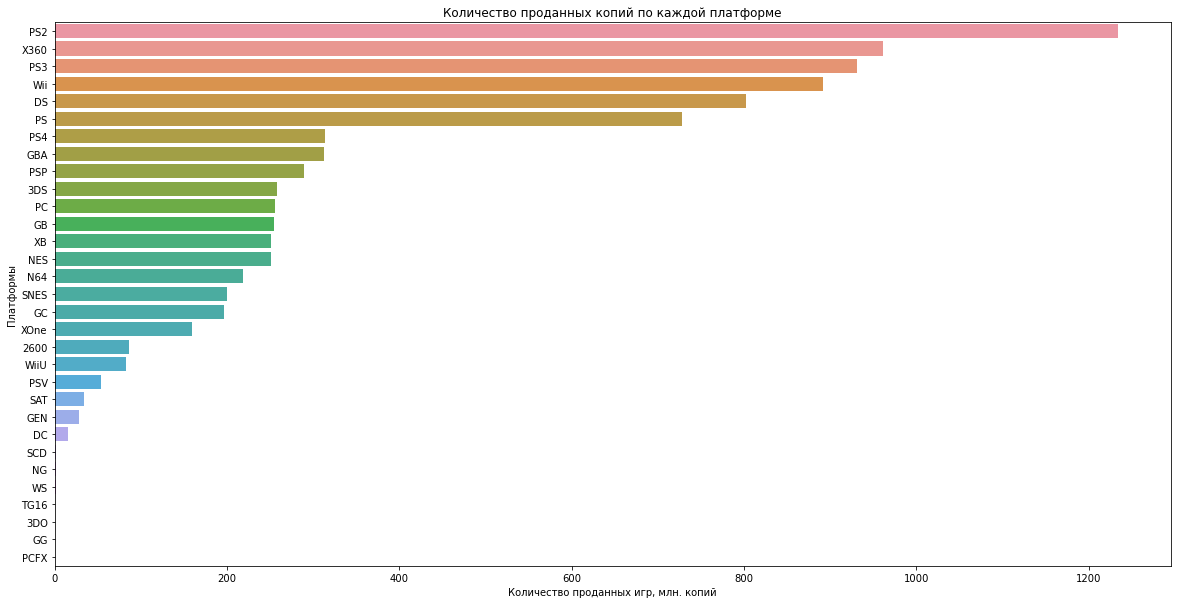

In [19]:
gvalues=games.groupby('platform').sum().sort_values('sales', ascending=False).reset_index()
plt.figure(figsize=(20, 10))
sns.barplot(x='sales', y='platform', data=gvalues)
plt.title("Количество проданных копий по каждой платформе")
plt.xlabel("Количество проданных игр, млн. копий")
plt.ylabel("Платформы")
plt.show()

In [20]:
# для изучения актуальных платформ исключим платформы с низким уровнем продаж - менее 50 млн. копий
top_platform = games_per_platform_fee.query('sales > 15').index
top_platform
top = games.query('platform in @top_platform')

In [21]:
games_per_plat_year = games.pivot_table(index = ['platform', 'year_of_release'], values='sales', aggfunc='sum')

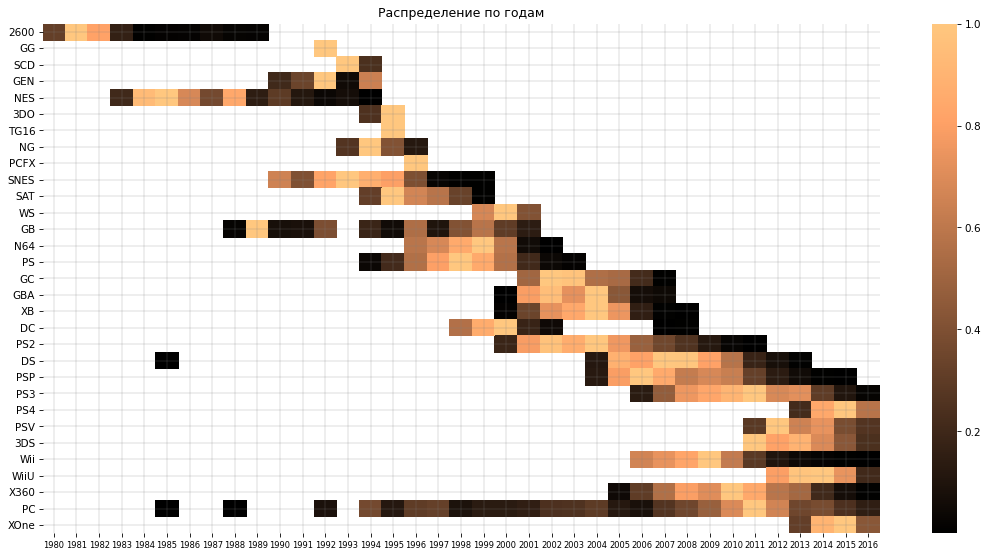

In [22]:
sort_platform = games.groupby('platform', as_index=False).agg({'year_of_release':'max'})
top_6_pivot = pd.pivot_table(games.query('year_of_release > 0')\
                   .assign(year_of_release = lambda row: row['year_of_release'].astype(int)), 
               values = 'sales', columns = 'year_of_release', index = 'platform', aggfunc='sum')
	
#сортировка по максимальному году платформы		   
viz_top_6 = top_6_pivot\
    .reset_index()\
    .merge(sort_platform, on='platform')\
    .sort_values(by='year_of_release')\
    .drop('year_of_release', axis=1)\
    .reset_index(drop=True)\
    .set_index('platform')
	
fig, ax = plt.subplots(figsize=(18, 9), dpi=75)
ax.set_title('Распределение по годам');
sns.heatmap(viz_top_6.apply(lambda row: row / row.max(), axis=1), cmap='copper', ax=ax)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels(rotation=0, labels=viz_top_6.columns, fontsize=8)
ax.set_yticklabels(rotation=0, labels=viz_top_6.index)
ax.grid(color='grey', linewidth=0.25)
plt.show()

Из представленного графика видно, что "живых платформ" осталось: PC, PS3, PS4, PSV, X360, XOne, 3DS, Wii, WiiU.
Средний срок жизни платформы 8-10 лет, не считая PC (тк данная платформа реглуярно обновляется и не требует нового поколения, не считая "железа"). 

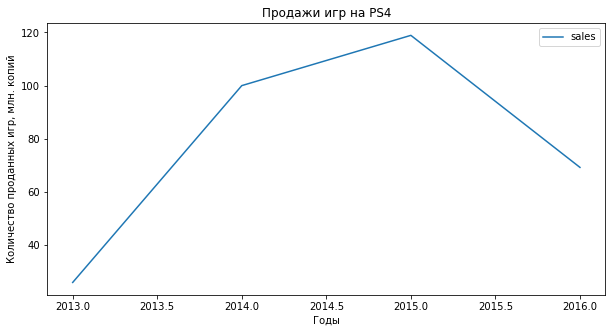

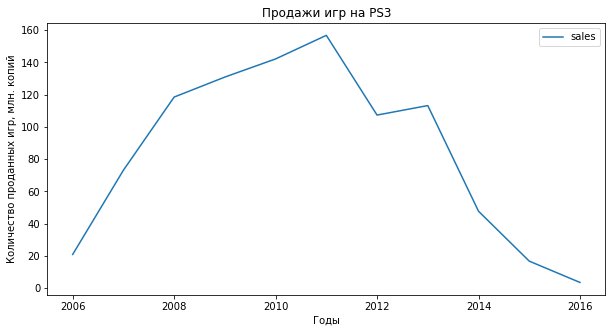

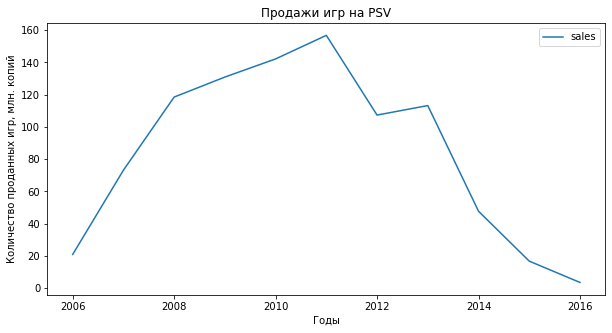

In [23]:
# проанализируем продажи серии платформ play station
ps4 = games.query('platform == "PS4"')[['year_of_release', 'sales']].groupby('year_of_release').sum()
ps4.plot(figsize=(10,5))
plt.title("Продажи игр на PS4")
plt.xlabel("Годы")
plt.ylabel("Количество проданных игр, млн. копий")
plt.show()
ps3 = games.query('platform == "PS3"')[['year_of_release', 'sales']].groupby('year_of_release').sum()
ps3.plot(figsize=(10,5))
plt.title("Продажи игр на PS3")
plt.xlabel("Годы")
plt.ylabel("Количество проданных игр, млн. копий")
plt.show()
psv = games.query('platform == "PSV"')[['year_of_release', 'sales']].groupby('year_of_release').sum()
ps3.plot(figsize=(10,5))
plt.title("Продажи игр на PSV")
plt.xlabel("Годы")
plt.ylabel("Количество проданных игр, млн. копий")
plt.show()

За 8-и летними циклами видно смену поколений PS-PS2-PS3-PS4, а так же PSP-PSV. Продажи PS3 близки к 0, а также виден резки спад продаж в 2013 году после выхода PS4, продажи которой тоже с 2015 года падают. Продажи мобильной платформы PSV пришли на смену PSP, но с 2011 года падают под давлением  конкурентов от Nintendo и мобильных платформ IOS и Android.

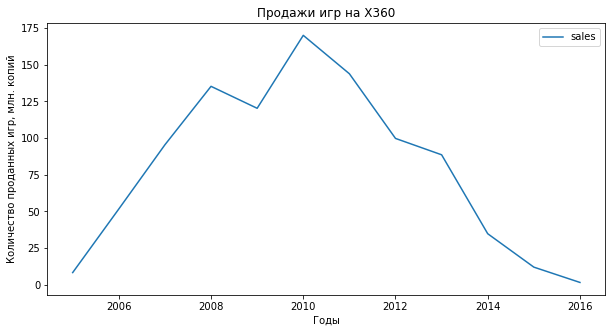

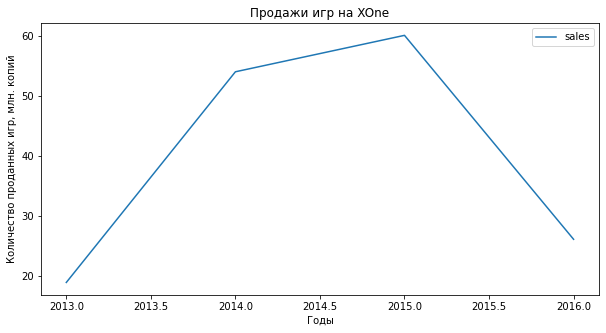

In [24]:
# проанализируем продажи серии платформ microsoft
X360 = games.query('platform == "X360"')[['year_of_release', 'sales']].groupby('year_of_release').sum()
X360.plot(figsize=(10,5))
plt.title("Продажи игр на X360")
plt.xlabel("Годы")
plt.ylabel("Количество проданных игр, млн. копий")
plt.show()
XOne = games.query('platform == "XOne"')[['year_of_release', 'sales']].groupby('year_of_release').sum()
XOne.plot(figsize=(10,5))
plt.title("Продажи игр на XOne")
plt.xlabel("Годы")
plt.ylabel("Количество проданных игр, млн. копий")
plt.show()

У консолей серии microsoft несколько иная ситцация, продажи X360 пришедшей на смену XB начали падать с 2010 года еще до выхода более новой консоли XOne. Продажи XOne падают с 2015 года и стремятся к уровню выпуска платформы 2013 года.

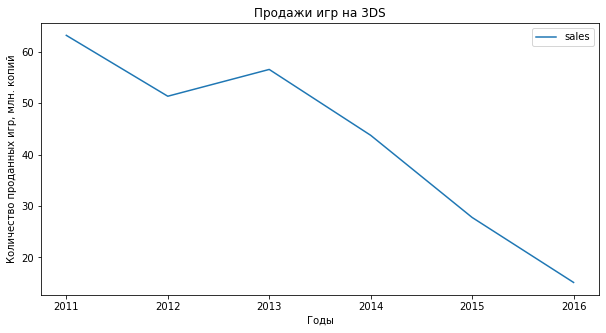

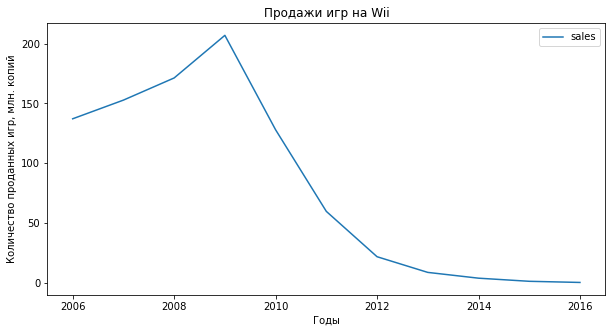

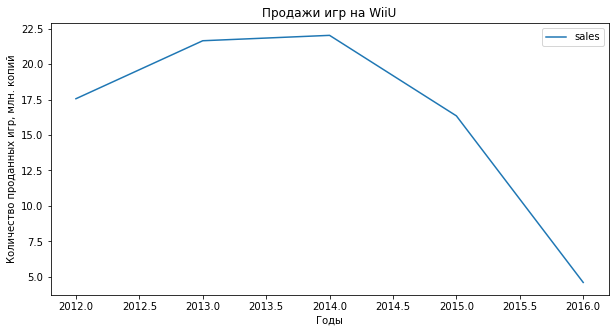

In [25]:
# проанализируем продажи мобильных платформ 3DS, Wii, WiiU
DS = games.query('platform == "3DS"')[['year_of_release', 'sales']].groupby('year_of_release').sum()
DS.plot(figsize=(10,5))
plt.title("Продажи игр на 3DS")
plt.xlabel("Годы")
plt.ylabel("Количество проданных игр, млн. копий")
plt.show()
Wii = games.query('platform == "Wii"')[['year_of_release', 'sales']].groupby('year_of_release').sum()
Wii.plot(figsize=(10,5))
plt.title("Продажи игр на Wii")
plt.xlabel("Годы")
plt.ylabel("Количество проданных игр, млн. копий")
plt.show()
WiiU = games.query('platform == "WiiU"')[['year_of_release', 'sales']].groupby('year_of_release').sum()
WiiU.plot(figsize=(10,5))
plt.title("Продажи игр на WiiU")
plt.xlabel("Годы")
plt.ylabel("Количество проданных игр, млн. копий")
plt.show()

Продажи всех мобильных платформ неуклонно падают. Стоит отметить рекордный уровень продаж Wii в районе 200 млн. копий, к которому не смогла подобраться ни одна платформа, в т.ч. преемница WiiU пик пришелся на уровень 22,5 млн копий к 2014 году, после которого стремительно падал.

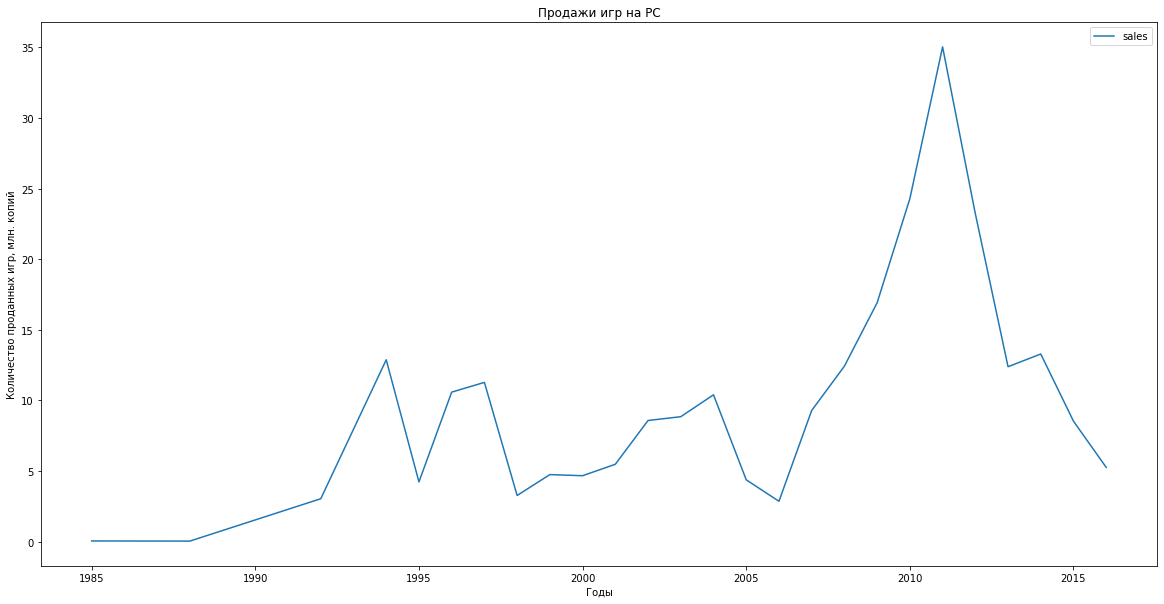

In [26]:
# проанализируем продажи игр на PC
PC = games.query('platform == "PC"')[['year_of_release', 'sales']].groupby('year_of_release').sum()
PC.plot(figsize=(20,10))
plt.title("Продажи игр на PC")
plt.xlabel("Годы")
plt.ylabel("Количество проданных игр, млн. копий")
plt.show()

In [27]:
# выведем на экран самые популярные платформы за все время
games[['platform', 'sales']].groupby('platform').sum().sort_values(by = 'sales', ascending = False).head()

,sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


In [28]:
# выведем на экран платформы, игры на которых продавались в 2016 году
games.query('year_of_release == 2016')[['platform', 'sales']].groupby('platform').sum().sort_values(by = 'sales', ascending = False) 

,sales
platform,
PS4,69.25
XOne,26.15
3DS,15.14
PC,5.25
WiiU,4.60
PSV,4.25
PS3,3.60
X360,1.52
Wii,0.18


У PC видим наиболее продолжительную истоию продаж с 1980-х годов. Объясняяется это тем, что она является первой платформой и не необходимости в смене поколеней, требуется лишь более современное "железо", которое не влечет смены платформы. Виден сильный отры в продажах в 2011 году. Вместе с тем стоит отметить, хоть у PC, более длинная история и сравнительно с остальными платформами стабильный уровень продаж, в количественном эквиваленте PC уступает именно "игровым" платформам.

Подведя итог продаж можно отметить, что пик продаж игровых платформ пройден (2010-2015 годы) и мы наблядаем спад по всем платформам, из чего можно сделать вывод, что IOS и Android (без данных по продажам на данных платформах нельзя это утверждать с полной уверенностью) сместили рынок в свою пользу и платформам необходимо произвести обновление, что мы наблядали в конце 2020 года.

Можно выделить наиболее "успешные" платформы - PS4 и XOne, в районе 70 и 25 млн. копий соответственно.

In [29]:
games.query('2014 <= year_of_release <= 2016')[['year_of_release', 'sales']].groupby('year_of_release').sum()

,sales
year_of_release,
2014,331.53
2015,267.98
2016,129.94


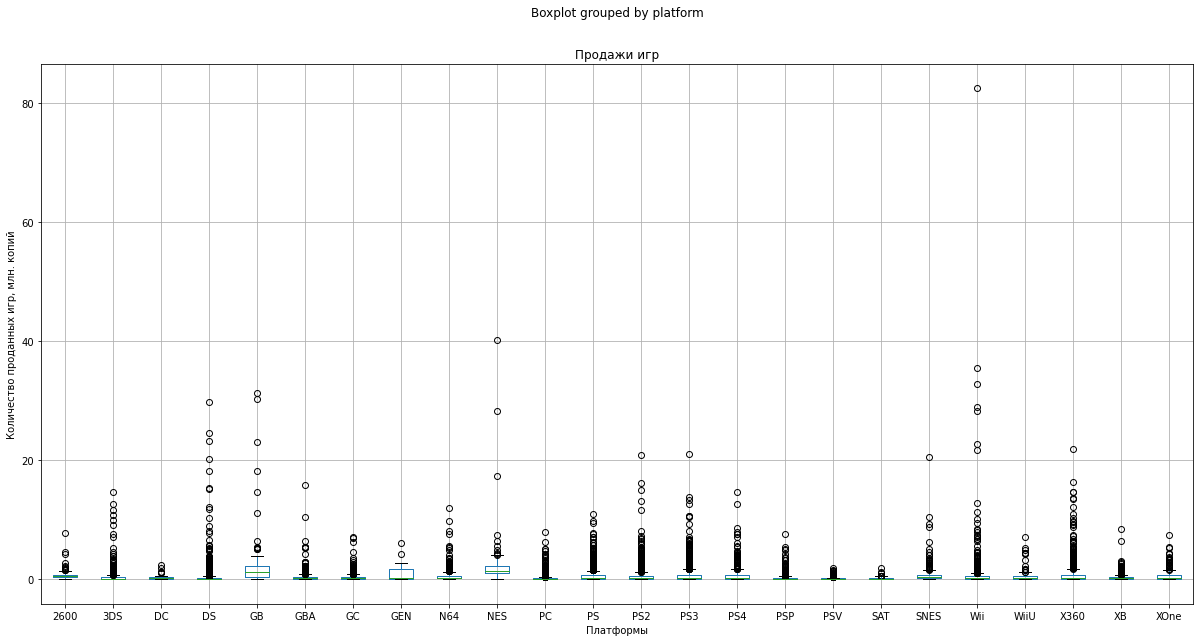

In [30]:
# построим boxplot по глобальным продажам игр в разбивке по платформам
top.boxplot('sales', by = 'platform', figsize=(20,10))
plt.title("Продажи игр")
plt.xlabel("Платформы")
plt.ylabel("Количество проданных игр, млн. копий")
plt.show()

Из графика видны существенные выбросы по продажам у платформ wii и nes. Можно преположить, что это были "взрывные эксклюзивы" или ошибки в данных.

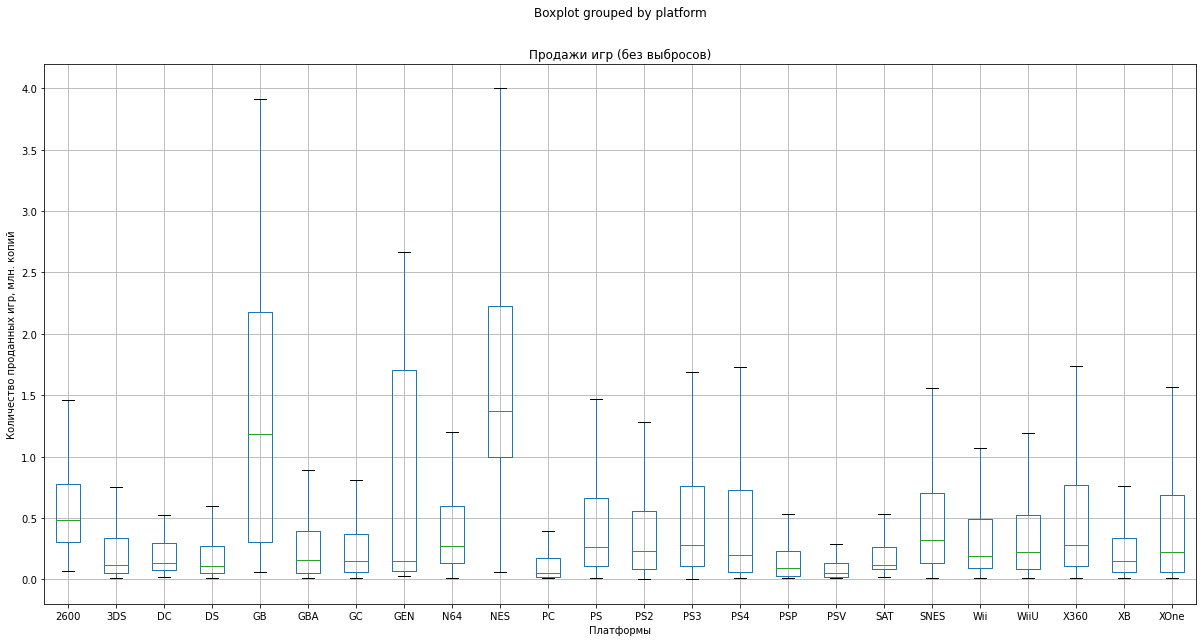

In [31]:
# отлючим отображение выбросов
top.boxplot('sales', by = 'platform', figsize=(20,10), showfliers=False)
plt.title("Продажи игр (без выбросов)")
plt.xlabel("Платформы")
plt.ylabel("Количество проданных игр, млн. копий")
plt.show()

Из графика видно, что лидерами являются - GB, GEN и NES, которые в настоящее время являются вымершими. Актуальные лидеры - PS3, PS4, X360, XOne.

### Исследование продаж внутри одной платформы

In [32]:
# изучим продажи за все время, распределенные по жанрам
games_genre = games[['genre', 'sales']].groupby('genre').sum().sort_values(by = 'sales', ascending = False) 
display(games_genre)
t = games_genre['sales'].sum()

,sales
genre,
Action,1716.52
Sports,1309.67
Shooter,1041.36
Role-Playing,931.08
Platform,825.55
Misc,790.29
Racing,723.49
Fighting,442.66
Simulation,387.96


In [33]:
# изучим продажи за 2016 год, распределенные по жанрам
gg16 = games.query('year_of_release == 2016')[['genre', 'sales']].groupby('genre').sum().sort_values(by = 'sales', ascending = False) 
display(gg16)
t16 = gg16['sales'].sum()

,sales
genre,
Shooter,38.22
Action,30.11
Sports,23.49
Role-Playing,18.18
Fighting,4.47
Adventure,3.82
Platform,3.23
Racing,2.79
Misc,2.60


In [34]:
# доли продаж по жанрам за 2016 год
pd.DataFrame(round((gg16['sales']/t16*100),2)).style.background_gradient('coolwarm') 

,sales
genre,
Shooter,29.410000
Action,23.170000
Sports,18.080000
Role-Playing,13.990000
Fighting,3.440000
Adventure,2.940000
Platform,2.490000
Racing,2.150000
Misc,2.000000


In [35]:
# доли продаж по жанрам за все время
pd.DataFrame(round((games_genre['sales']/t*100),2)).style.background_gradient('coolwarm') 

,sales
genre,
Action,19.470000
Sports,14.860000
Shooter,11.810000
Role-Playing,10.560000
Platform,9.370000
Misc,8.970000
Racing,8.210000
Fighting,5.020000
Simulation,4.400000


Видим, что основная 5 жанров, на которые в 2016 году пришлось 88% продаж (за все время 66%), не перетерпела сильных изменений, только платформеров сметили файтинги. ТОП-5 жаноров за 2016 год - Shooter, Action, Sports, Role-Playing,	Fighting.

Также мы видим, что в разбивке за все время нет настолько явных лидеров продаж по жанрам, как это наблюдается в 2016 году.

In [36]:
# сформируем таблицу, где отображается информация только с оценками пользователей для изучения корреляции
games_sc = games.query('user_score != "tbd"')
games_sc['user_score'] = games_sc['user_score'].astype(float)
games_sc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14068 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             14068 non-null  object 
 1   platform         14068 non-null  object 
 2   year_of_release  14068 non-null  int64  
 3   genre            14068 non-null  object 
 4   na_sales         14068 non-null  float64
 5   eu_sales         14068 non-null  float64
 6   jp_sales         14068 non-null  float64
 7   other_sales      14068 non-null  float64
 8   critic_score     6927 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           14068 non-null  object 
 11  sales            14068 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.4+ MB


<ipython-input-36-a1fee2499f49>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_sc['user_score'] = games_sc['user_score'].astype(float)


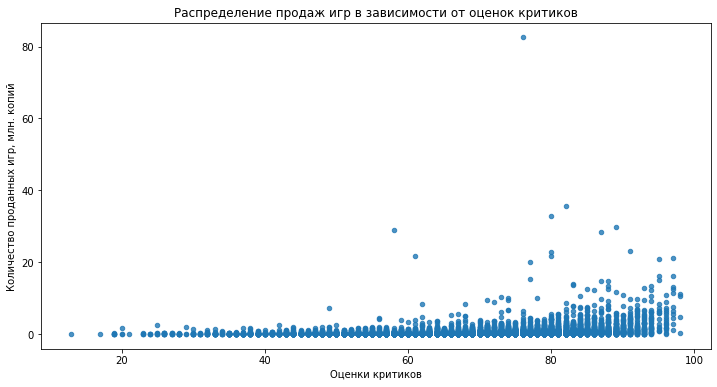

0.24534884547411379


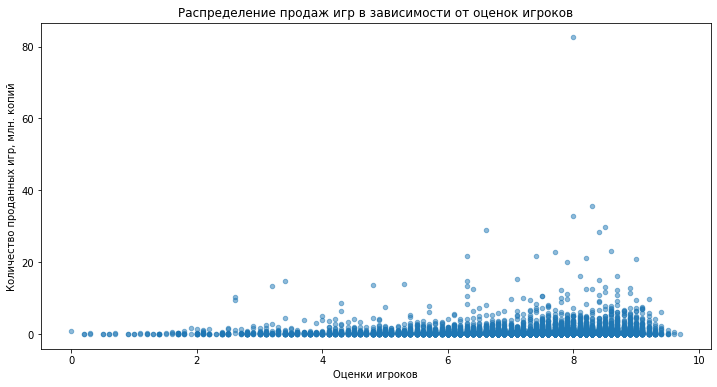

0.08798399271321641


In [37]:
#Изучим, как влияют на продажи отзывы пользователей и критиков по всем платформам. 
#Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
games.plot(x='critic_score', y='sales', kind='scatter', figsize=(12, 6), alpha=0.8) 
plt.title("Распределение продаж игр в зависимости от оценок критиков")
plt.xlabel("Оценки критиков")
plt.ylabel("Количество проданных игр, млн. копий")
plt.show()
print(games['critic_score'].corr(games['sales']))
games_sc.plot(x='user_score', y='sales', kind='scatter', figsize=(12, 6), alpha=0.5)
plt.title("Распределение продаж игр в зависимости от оценок игроков")
plt.xlabel("Оценки игроков")
plt.ylabel("Количество проданных игр, млн. копий")
plt.show()
print(games_sc['user_score'].corr(games_sc['sales']))

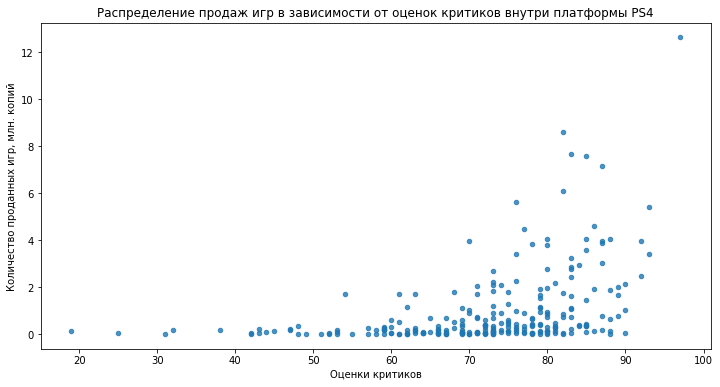

0.40656790206178095


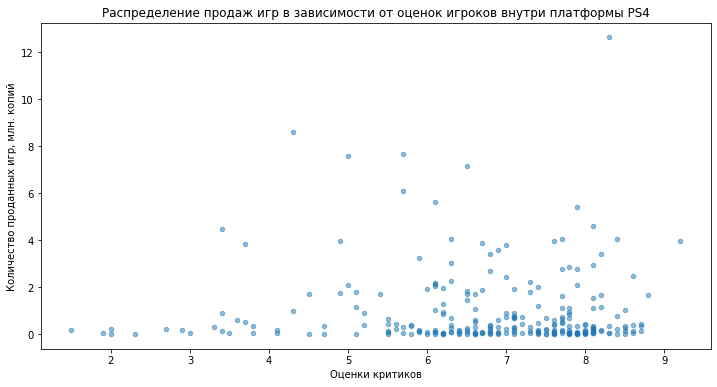

-0.031957110204556424


In [38]:
#Изучим, как влияют на продажи внутри платформы PS4 отзывы пользователей и критиков. 
games.query('platform == "PS4"').plot(x='critic_score', y='sales', kind='scatter', figsize=(12, 6), alpha=0.8)
plt.title("Распределение продаж игр в зависимости от оценок критиков внутри платформы PS4")
plt.xlabel("Оценки критиков")
plt.ylabel("Количество проданных игр, млн. копий")
plt.show()
print(games.query('platform == "PS4"')['critic_score'].corr(games.query('platform == "PS4"')['sales']))
games_sc.query('platform == "PS4"').plot(x='user_score', y='sales', kind='scatter', figsize=(12, 6), alpha=0.5)
plt.title("Распределение продаж игр в зависимости от оценок игроков внутри платформы PS4")
plt.xlabel("Оценки критиков")
plt.ylabel("Количество проданных игр, млн. копий")
plt.show()
print(games_sc.query('platform == "PS4"')['user_score'].corr(games_sc.query('platform == "PS4"')['sales']))

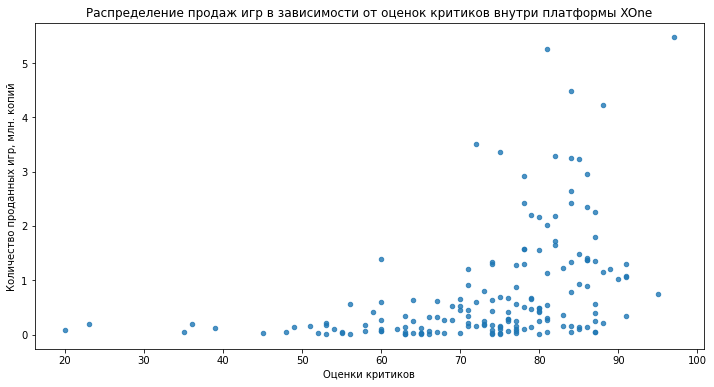

0.4169983280084017


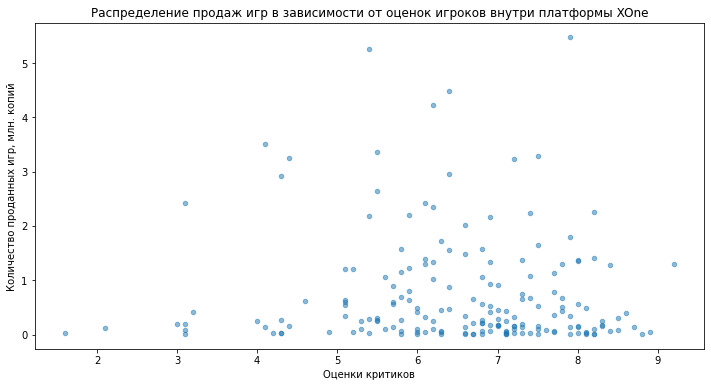

-0.06892505328279414


In [39]:
#Изучим, как влияют на продажи внутри платформы платформы XOne отзывы пользователей и критиков. 
games.query('platform == "XOne"').plot(x='critic_score', y='sales', kind='scatter', figsize=(12, 6), alpha=0.8) 
plt.title("Распределение продаж игр в зависимости от оценок критиков внутри платформы XOne")
plt.xlabel("Оценки критиков")
plt.ylabel("Количество проданных игр, млн. копий")
plt.show()
print(games.query('platform == "XOne"')['critic_score'].corr(games.query('platform == "XOne"')['sales']))
games_sc.query('platform == "XOne"').plot(x='user_score', y='sales', kind='scatter', figsize=(12, 6), alpha=0.5)
plt.title("Распределение продаж игр в зависимости от оценок игроков внутри платформы XOne")
plt.xlabel("Оценки критиков")
plt.ylabel("Количество проданных игр, млн. копий")
plt.show()
print(games_sc.query('platform == "XOne"')['user_score'].corr(games_sc.query('platform == "XOne"')['sales']))

В целом по всем платформам видна несущественная зависимость продаж от отзывов критиков. Более существенную зависимость можем наблюдать у более популярных платформ таких как PS4 и Xone, но нельзя сказать, что отзывы напрямую на них влияют.

Отзывы пользователей никак не влияют на продажи, как на всех платформаз в целом, так и на наиболее популярных в частности (PS4 и Xone).

## Портрет пользователя каждого региона  (NA, EU, JP)

In [40]:
# Самые популярные платформы в Северной Америке (топ-5) за 2016 год
game_na_n = games.query('year_of_release == 2016')[['platform', 'na_sales']].groupby('platform').sum().sort_values(by = 'na_sales', ascending = False).head()
display(game_na_n)
# посчитаем доли по платформам
pd.DataFrame(round((game_na_n['na_sales']/game_na_n['na_sales'].sum()*100),2)).style.background_gradient('coolwarm')

,na_sales
platform,
PS4,21.49
XOne,14.27
3DS,4.14
WiiU,2.10
PC,1.36


,na_sales
platform,
PS4,49.560000
XOne,32.910000
3DS,9.550000
WiiU,4.840000
PC,3.140000


In [41]:
# Самые популярные платформы в Северной Америке (топ-5) за все время
game_na = games[['platform', 'na_sales']].groupby('platform').sum().sort_values(by = 'na_sales', ascending = False).head()
display(game_na)
# посчитаем доли по платформам
pd.DataFrame(round((game_na['na_sales']/game_na['na_sales'].sum()*100),2)).style.background_gradient('coolwarm')

,na_sales
platform,
X360,595.74
PS2,572.92
Wii,486.87
PS3,390.13
DS,380.31


,na_sales
platform,
X360,24.560000
PS2,23.620000
Wii,20.070000
PS3,16.080000
DS,15.680000


Самой пополярной платформой в Северной Америке является X360 местного производителя компании microsoft, но если смотреть данные за 2016 год, то мы видим, что она уступила место своему основному конкуренту компании Sony и в лидерство выбилась большим отрывом PS4 представительница следующего поколения (отры по продажам в 2016 году в 1,5 раза).

Так же видно, что microsoft и sony захватили больший рынок к 2016 году (более 80% продаж) по сравнению с показателем по всем годам (менее 50%).

In [42]:
# Самые популярные платформы в Европе (топ-5) за 2016 год
game_eu_n = games.query('year_of_release == 2016')[['platform', 'eu_sales']].groupby('platform').sum().sort_values(by = 'eu_sales', ascending = False).head()
display(game_eu_n)
# посчитаем доли по платформам
pd.DataFrame(round((game_eu_n['eu_sales']/game_eu_n['eu_sales'].sum()*100),2)).style.background_gradient('coolwarm')

,eu_sales
platform,
PS4,31.78
XOne,9.63
PC,3.53
3DS,2.33
WiiU,1.48


,eu_sales
platform,
PS4,65.190000
XOne,19.750000
PC,7.240000
3DS,4.780000
WiiU,3.040000


In [43]:
# Самые популярные платформы в Европе (топ-5) за все время
game_eu_n = games[['platform', 'eu_sales']].groupby('platform').sum().sort_values(by = 'eu_sales', ascending = False).head()
display(game_eu_n)
# посчитаем доли по платформам
pd.DataFrame(round((game_eu_n['eu_sales']/game_eu_n['eu_sales'].sum()*100),2)).style.background_gradient('coolwarm')

,eu_sales
platform,
PS2,332.63
PS3,327.21
X360,268.32
Wii,258.32
PS,212.39


,eu_sales
platform,
PS2,23.780000
PS3,23.390000
X360,19.180000
Wii,18.470000
PS,15.180000


В Европе мы наблядаем куда более явное доминирование компании Sony. PS2 и PS3 вышли в отрыв по показателем продаж за все время. Также наблядаем сущетсвенный отрыв по продажам консолей японской компании по сравнению с американским конкурентом более чем в 3 раза за 2016 год.

In [44]:
# Самые популярные платформы в Японии (топ-5) за 2016 год
game_jp_n = games.query('year_of_release == 2016')[['platform', 'jp_sales']].groupby('platform').sum().sort_values(by = 'jp_sales', ascending = False).head()
display(game_jp_n)
# посчитаем доли по платформам
pd.DataFrame(round((game_jp_n['jp_sales']/game_jp_n['jp_sales'].sum()*100),2)).style.background_gradient('coolwarm')

,jp_sales
platform,
3DS,8.03
PS4,5.74
PSV,3.56
PS3,1.30
WiiU,0.67


,jp_sales
platform,
3DS,41.610000
PS4,29.740000
PSV,18.450000
PS3,6.740000
WiiU,3.470000


In [45]:
# Самые популярные платформы в Японии (топ-5) за все время
game_jp_n = games[['platform', 'jp_sales']].groupby('platform').sum().sort_values(by = 'jp_sales', ascending = False).head()
display(game_jp_n)
# посчитаем доли по платформам
pd.DataFrame(round((game_jp_n['jp_sales']/game_jp_n['jp_sales'].sum()*100),2)).style.background_gradient('coolwarm')

,jp_sales
platform,
DS,175.02
PS,139.78
PS2,137.54
SNES,116.55
3DS,100.62


,jp_sales
platform,
DS,26.140000
PS,20.880000
PS2,20.540000
SNES,17.410000
3DS,15.030000


В Японии картина несколько иная, но также с абсолютным доминированием местных компании. В данном регионе лидирует платформа DS и 3DS в 2016 году. Платформы компании Sony идут следом. Американская компания в топ-5 не попала

Подводя итоги можно сделать вывод, что в США с небольшим отрыв игровая индустрия продаются лучше чем в Европе и существенно лучше чем в Японии. Также видим что в Америке местная компания уступила лидерство по продажам к 2016 года японскому конкуренту.
В японии же лидирует местные компании и первое место там занимают мобильные платформы.

In [46]:
# Самые популярные жанры в Северной Америке (топ-5) за 2016 год
games.query('year_of_release == 2016')[['genre', 'na_sales']].groupby('genre').sum().sort_values(by = 'na_sales', ascending = False).head()

,na_sales
genre,
Shooter,16.24
Action,9.29
Sports,7.54
Role-Playing,5.89
Fighting,1.84


In [47]:
# Самые популярные жанры в Северной Америке (топ-5) за все время
games[['genre', 'na_sales']].groupby('genre').sum().sort_values(by = 'na_sales', ascending = False).head()

,na_sales
genre,
Action,863.17
Sports,671.20
Shooter,584.83
Platform,444.44
Misc,399.57


В Северной Америке предпочтения пользователей в части жанорв сильных изменений не притерпели. Наиболее поплуярными играми являются экшены и шутеры. Также к 2016 году в топ выбились ролевые игры.

In [48]:
# Самые популярные жанры в Европе (топ-5) за 2016 год
games.query('year_of_release == 2016')[['genre', 'eu_sales']].groupby('genre').sum().sort_values(by = 'eu_sales', ascending = False).head()

,eu_sales
genre,
Shooter,15.90
Sports,12.01
Action,10.68
Role-Playing,4.28
Racing,1.77


In [49]:
# Самые популярные жанры в Европе (топ-5) за все время
games[['genre', 'eu_sales']].groupby('genre').sum().sort_values(by = 'eu_sales', ascending = False).head()

,eu_sales
genre,
Action,510.99
Sports,371.33
Shooter,314.52
Racing,234.49
Misc,210.60


Практические идентичную картину, как в Северной Америке, мы наблюдаем в Европе с небольшим отличием в 2016 году замыкает топ "гонки" в оличие от фатинга в Америке.

In [50]:
# Самые популярные жанры в Японии (топ-5) за 2016 год
games.query('year_of_release == 2016')[['genre', 'jp_sales']].groupby('genre').sum().sort_values(by = 'jp_sales', ascending = False).head()

,jp_sales
genre,
Action,7.07
Role-Playing,6.61
Adventure,1.18
Shooter,1.06
Misc,1.04


In [51]:
# Самые популярные жанры в Японии (топ-5) за все время
games[['genre', 'jp_sales']].groupby('genre').sum().sort_values(by = 'jp_sales', ascending = False).head()

,jp_sales
genre,
Role-Playing,353.39
Action,160.14
Sports,134.93
Platform,130.71
Misc,107.02


В Японии люди большее препочтение отдают ролевым играм - 1-е место по жанрам за все время. В остальном картина по жанрам похоже на Америку и Европу, разве что можно наблядать замыкающие жанры - Platform и Misc.

В целом игроки любят по большей части экшены и шутеры, а также спортивные симуляторы. На востоке видим перевес в пользу ролевых игр.
Можно отметить, что жанры Shooter и Action смежные и часто переплетаются в одних и тех же играх. Также можно отметить неизменную любовь пользователей в спортивным симуляторам и ролевым играм.

In [52]:
# составим таблицу продаж игр по рейтингам
gr = games[['rating', 'sales']].groupby('rating').sum().sort_values(by = 'sales', ascending = False)
display(gr)
# посчитаем доли по рейтингам
pd.DataFrame(round((gr['sales']/gr['sales'].sum()*100),2)).style.background_gradient('coolwarm')

,sales
rating,
nd,2822.10
E,2407.61
T,1473.08
M,1462.53
E10+,640.98
K-A,4.32
AO,1.96
EC,1.75
RP,0.04


,sales
rating,
nd,32.020000
E,27.310000
T,16.710000
M,16.590000
E10+,7.270000
K-A,0.050000
AO,0.020000
EC,0.020000
RP,0.000000


«E» («Everyone») — «Для всех»;
«T» («Teen») — «Подросткам 13—19 лет»;
«M» («Mature») — «От 17 лет»;
«E10+» («Everyone 10 and older») — «Для всех старше 10 лет»;
«K-A» («Kids to Adults»)— «Для детей и взрослых»;
«AO» («Adults Only 18+») — «Только для взрослых»;
«EC» («Early childhood») — «Для детей младшего возраста»;
«RP» («Rating Pending»“) — «Рейтинг ожидается»;
"nd" - игры без рейтинга.

Из приведенных данных видно, что чем ниже ограничения тем выше количество проданных копий игр. Исключение составляет EC - игры для детей младшего возраста, думаю из-за малого количества игроков, тк основная масса - кольники и старше.
Далее проанализируем продажи по регионам в соответствии с возрастными рейтингами.

Также стоит обратить внимание, что треть игр из представленных данных без рейтинга (либо рейтинг проставлен другой организацией, либо она его не имеет).

In [53]:
grna = games[['rating', 'na_sales']].groupby('rating').sum().sort_values(by = 'na_sales', ascending = False)
display(grna)
# посчитаем доли по рейтингам
pd.DataFrame(round((grna['na_sales']/grna['na_sales'].sum()*100),2)).style.background_gradient('coolwarm')

,na_sales
rating,
E,1274.24
nd,1225.84
T,747.60
M,742.89
E10+,345.50
K-A,2.56
EC,1.53
AO,1.26
RP,0.00


,na_sales
rating,
E,29.350000
nd,28.240000
T,17.220000
M,17.110000
E10+,7.960000
K-A,0.060000
EC,0.040000
AO,0.030000
RP,0.000000


In [54]:
greu = games[['rating', 'eu_sales']].groupby('rating').sum().sort_values(by = 'eu_sales', ascending = False)
display(greu)
# посчитаем доли по рейтингам
pd.DataFrame(round((greu['eu_sales']/greu['eu_sales'].sum()*100),2)).style.background_gradient('coolwarm')

,eu_sales
rating,
E,703.87
nd,609.65
M,480.00
T,421.79
E10+,183.35
AO,0.61
K-A,0.27
EC,0.11
RP,0.03


,eu_sales
rating,
E,29.330000
nd,25.410000
M,20.000000
T,17.580000
E10+,7.640000
AO,0.030000
K-A,0.010000
EC,0.000000
RP,0.000000


In [55]:
grjp = games[['rating', 'jp_sales']].groupby('rating').sum().sort_values(by = 'jp_sales', ascending = False)
display(grjp)
# посчитаем доли по рейтингам
pd.DataFrame(round((grjp['jp_sales']/grjp['jp_sales'].sum()*100),2)).style.background_gradient('coolwarm')

,jp_sales
rating,
nd,836.74
E,197.96
T,150.70
M,63.58
E10+,40.20
K-A,1.46
AO,0.00
EC,0.00
RP,0.00


,jp_sales
rating,
nd,64.830000
E,15.340000
T,11.680000
M,4.930000
E10+,3.110000
K-A,0.110000
AO,0.000000
EC,0.000000
RP,0.000000


Из таблиц продаж игр по регионам в соответствии с жанрам можно сделать вывод, что общая тендция у всех одна и совпадает с предыдущим выводом. В Европе можем наблюдать небольшую перетасовку - игры с рейтингом М (от 17 лет) вышли на второе место, что преположительно может сказать о том, что там большая доля игроков старше 17 лет. Хотя на мой взгляд на эти рейтинги никто не обращает внимания.

Стоит обратить внимание, что 65% игр в Японии без рейтинга, это говорит о том, что рейтинги скорее всего там проставляют местные компании. Или игры не выходят на международный рынок.

## Проверка гипотез

In [56]:
games_sc.dropna(subset = ['user_score'], inplace = True) 

<ipython-input-56-db01ba461479>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_sc.dropna(subset = ['user_score'], inplace = True)


In [57]:
g_uc_x = games_sc.query('platform == "XOne"')
g_uc_x['user_score'].describe().T

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [58]:
g_uc_pc = games_sc.query('platform == "PC"')
g_uc_pc['user_score'].describe().T

count    755.000000
mean       7.065960
std        1.532718
min        1.400000
25%        6.200000
50%        7.500000
75%        8.200000
max        9.300000
Name: user_score, dtype: float64

Нулевая гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Алтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [59]:
# Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
alpha = 0.05 

results = st.ttest_ind(g_uc_x['user_score'], g_uc_pc['user_score'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.5385802963771776e-06
Отвергаем нулевую гипотезу


In [60]:
g_uc_a = games_sc.query('genre == "Action"')
g_uc_a['user_score'].describe().T

count    1796.000000
mean        7.058129
std         1.423901
min         0.300000
25%         6.300000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64

In [61]:
g_uc_s = games_sc.query('genre == "Sports"')
g_uc_s['user_score'].describe().T

count    1081.000000
mean        6.951434
std         1.619585
min         0.200000
25%         6.100000
50%         7.400000
75%         8.100000
max         9.500000
Name: user_score, dtype: float64

Нулевая гипотеза - Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Алтернативная гипотеза - Средние пользовательские рейтинги жанров Action и Sports различаются.

In [62]:
# Средние пользовательские рейтинги жанров Action и Sports разные
alpha = 0.05 

results = st.ttest_ind(g_uc_a['user_score'], g_uc_s['user_score'], equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.07370217419278534
Не получилось отвергнуть нулевую гипотезу


Используя статистические методы отвергли гипотезу равенства средней рейтинга пользователей по платформам PC и XOne. Нулевую гипотезу равенства средней рейтинга пользователей по жанрам Action и Sport опровергнуть не удалось.

## Общий вывод

Подводя итог по результатам проведенного анализа данных делаем следующие выводы.
Из данных представленных за период 1980-2016 год мы видим, что пик выпуска игр пройден (2007-2008) годы. Вероятнее всего на это повлияло несколько факторов, в том числе мировой экономический кризис (2008 год), выход на первые планы игр на мобильный платформах таких пополярных ОС как IOS и Android. 

Многие из представленных платформ уже сильно устарели и экономического смысла выпускать на них игры нет.
До сих пор пользующиеся спhосом платформы: PS4, XOne, PC, 3DS и WiiU.

Стоит отметить неодинаковую популярность разных платформ в различных регионах. В Европе и Северной Америке наибольшим спросом пользуются PS4 и XOne, в Японии на первый план выходит мобильная платформа 3DS (более 41% доли на рынке по продажам) с большим отрывом от конкурентов. Из чего можно сделать вывод, что игроманы в Японии препочитаю моюильные платформы и брать игры с собой, в отличии от своих западных соседей (Европа и Северная Америка, доли продаж в которых PS4 50% и 65% соответственно), которые препочитают станционарные платформы компаний Sony и Micrisoft.

Немаловажный фактор - жанр игры. Наблюдается сильный отрыв в количестве продаж у таких жанров как: Shooter, action, sports и role-playing. Shooter и action пользуется большим спросом в Европе и Северной Америке, в Японии больше предпочитают role-playing.

Также заметна зависимость продаж от рейтинга представленного ESRB - чем ниже входной порог тем больше проданных копий игр.

Зависимости продаж и рейтинга пользователей не наблюдается, в отличии от рейтинга критиков. На таких популярных платформах как PS4 и XOne видим зависимость от размера оценки игры (чем выше тем больше количество проданных копий). Из чего можно сделать вывод, что игроки опираются на мнения попоулярных изданий перед покупкой игры.

Также, используя статистические методы опревергли гипотезу равенства среднего рейтинга пользователей по платформам PC и XOne. Нулевую гипотезу равенства среднего рейтинга пользователей по жанрам Action и Sport опровергнуть не удалось.